In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [7]:
units = 'imperial'
url="http://api.openweathermap.org/data/2.5/weather?" + 'appid=' + weather_api_key + '&units=' + units

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | najran
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | pueblo
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | tanout
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | togur
Processing Record 11 of Set 1 | lamar
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | budogoshch
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | grand gaube
Processing Record 17 of Set 1 | pimentel
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | kununurra
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | carnarvon


Processing Record 37 of Set 4 | lardos
Processing Record 38 of Set 4 | ardakan
Processing Record 39 of Set 4 | henties bay
Processing Record 40 of Set 4 | covington
Processing Record 41 of Set 4 | flinders
Processing Record 42 of Set 4 | mehamn
Processing Record 43 of Set 4 | kharan
Processing Record 44 of Set 4 | lavrentiya
Processing Record 45 of Set 4 | sao jose da coroa grande
Processing Record 46 of Set 4 | pascagoula
Processing Record 47 of Set 4 | mahebourg
Processing Record 48 of Set 4 | marcona
City not found. Skipping...
Processing Record 49 of Set 4 | faranah
Processing Record 50 of Set 4 | sao jose do belmonte
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | rafai
Processing Record 3 of Set 5 | eskasem
City not found. Skipping...
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | erzin
Processing Record 6 of Set 5 | matara
Processing Record 7 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 5 | la palma

Processing Record 30 of Set 8 | morant bay
Processing Record 31 of Set 8 | kenai
Processing Record 32 of Set 8 | gazojak
Processing Record 33 of Set 8 | pleasanton
Processing Record 34 of Set 8 | khorinsk
Processing Record 35 of Set 8 | praia
Processing Record 36 of Set 8 | skibbereen
Processing Record 37 of Set 8 | odweyne
Processing Record 38 of Set 8 | tiznit
Processing Record 39 of Set 8 | ayer tawar
Processing Record 40 of Set 8 | guipavas
Processing Record 41 of Set 8 | deh rawud
City not found. Skipping...
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | hadishahr
Processing Record 44 of Set 8 | banepa
Processing Record 45 of Set 8 | nam dinh
Processing Record 46 of Set 8 | sri aman
Processing Record 47 of Set 8 | nurota
Processing Record 48 of Set 8 | lompoc
Processing Record 49 of Set 8 | manta
Processing Record 50 of Set 8 | honningsvag
Processing Record 1 of Set 9 | halalo
City not found. Skipping...
Processing Record 2 of Set 9 | bartica
Processing Reco

Processing Record 16 of Set 12 | sorong
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | nobeoka
Processing Record 19 of Set 12 | ruidoso
Processing Record 20 of Set 12 | sechura
Processing Record 21 of Set 12 | kushiro
Processing Record 22 of Set 12 | labuhan
Processing Record 23 of Set 12 | tessalit
Processing Record 24 of Set 12 | sterling
Processing Record 25 of Set 12 | playa del carmen
Processing Record 26 of Set 12 | surt
Processing Record 27 of Set 12 | dekoa
City not found. Skipping...
Processing Record 28 of Set 12 | dakar
Processing Record 29 of Set 12 | rio grande
Processing Record 30 of Set 12 | galle
Processing Record 31 of Set 12 | bagan
Processing Record 32 of Set 12 | ponta delgada
Processing Record 33 of Set 12 | whitianga
Processing Record 34 of Set 12 | mocambique
City not found. Skipping...
Processing Record 35 of Set 12 | fare
Processing Record 36 of Set 12 | zamania
Processing Record 37 of Set 12 | galesong
Processing Record 38 of S

In [10]:
len(city_data)

554

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Najran,17.4924,44.1277,56.05,43,8,2.59,SA,2022-02-02 23:44:32
1,Jamestown,42.0970,-79.2353,40.32,67,100,1.99,US,2022-02-02 23:37:15
2,Severo-Kurilsk,50.6789,156.1250,30.13,76,98,9.22,RU,2022-02-02 23:44:32
3,Rikitea,-23.1203,-134.9692,78.69,73,100,8.05,PF,2022-02-02 23:43:27
4,Pueblo,38.2545,-104.6091,18.01,81,100,1.01,US,2022-02-02 23:39:40
5,Bluff,-46.6000,168.3333,58.80,65,100,17.85,NZ,2022-02-02 23:44:33
6,Tanout,14.9709,8.8879,59.65,16,3,12.12,NE,2022-02-02 23:44:34
7,Karratha,-20.7377,116.8463,83.97,65,54,2.73,AU,2022-02-02 23:44:34
8,Mataura,-46.1927,168.8643,58.48,83,100,5.17,NZ,2022-02-02 23:44:35
9,Togur,58.3631,82.8265,9.03,96,92,6.73,RU,2022-02-02 23:44:35


In [12]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df=city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2022-02-02 23:44:32,17.4924,44.1277,56.05,43,8,2.59
1,Jamestown,US,2022-02-02 23:37:15,42.0970,-79.2353,40.32,67,100,1.99
2,Severo-Kurilsk,RU,2022-02-02 23:44:32,50.6789,156.1250,30.13,76,98,9.22
3,Rikitea,PF,2022-02-02 23:43:27,-23.1203,-134.9692,78.69,73,100,8.05
4,Pueblo,US,2022-02-02 23:39:40,38.2545,-104.6091,18.01,81,100,1.01
5,Bluff,NZ,2022-02-02 23:44:33,-46.6000,168.3333,58.80,65,100,17.85
6,Tanout,NE,2022-02-02 23:44:34,14.9709,8.8879,59.65,16,3,12.12
7,Karratha,AU,2022-02-02 23:44:34,-20.7377,116.8463,83.97,65,54,2.73
8,Mataura,NZ,2022-02-02 23:44:35,-46.1927,168.8643,58.48,83,100,5.17
9,Togur,RU,2022-02-02 23:44:35,58.3631,82.8265,9.03,96,92,6.73


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

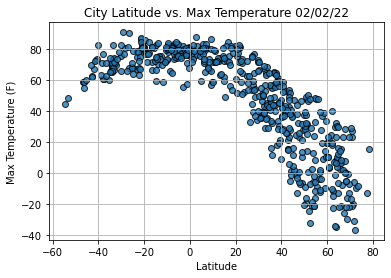

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

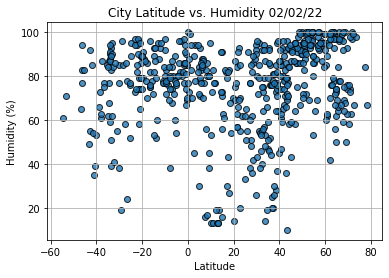

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

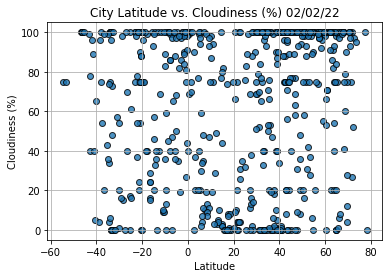

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

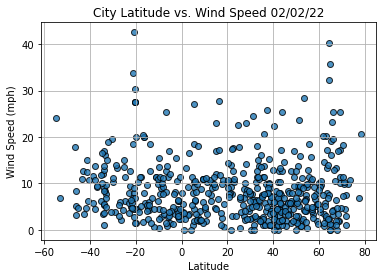

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                   Budogoshch
Country                        RU
Date          2022-02-02 23:44:36
Lat                       59.2816
Lng                       32.4707
Max Temp                    10.11
Humidity                       99
Cloudiness                     99
Wind Speed                   1.86
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Najran,SA,2022-02-02 23:44:32,17.4924,44.1277,56.05,43,8,2.59
1,Jamestown,US,2022-02-02 23:37:15,42.0970,-79.2353,40.32,67,100,1.99
2,Severo-Kurilsk,RU,2022-02-02 23:44:32,50.6789,156.1250,30.13,76,98,9.22
4,Pueblo,US,2022-02-02 23:39:40,38.2545,-104.6091,18.01,81,100,1.01
6,Tanout,NE,2022-02-02 23:44:34,14.9709,8.8879,59.65,16,3,12.12


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

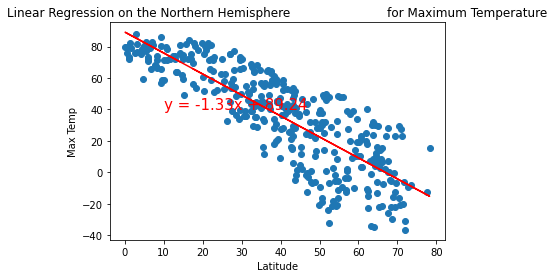

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

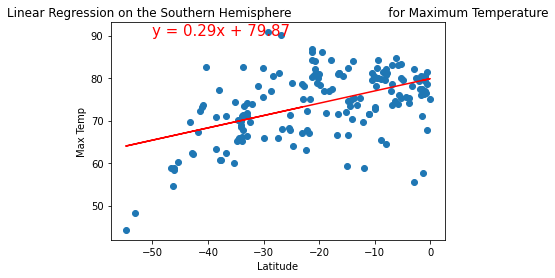

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

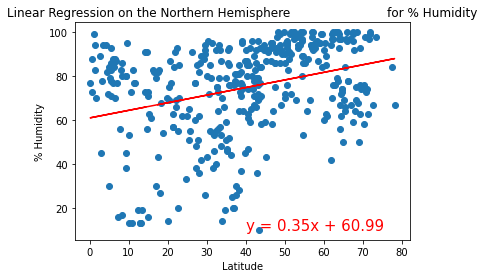

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

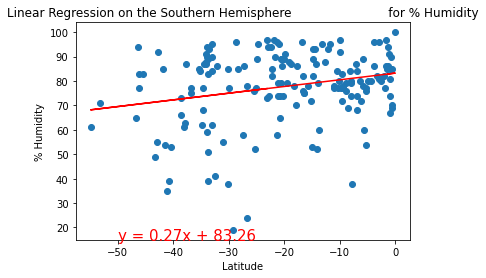

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

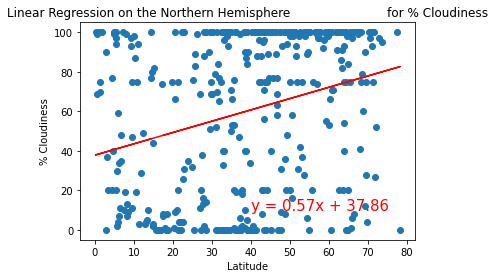

In [41]:
#kill Drill 6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

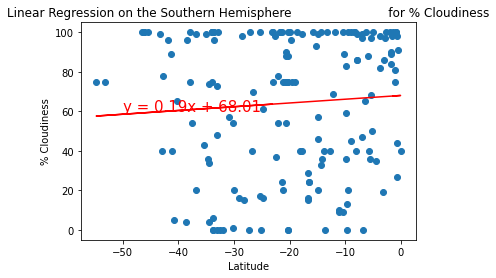

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

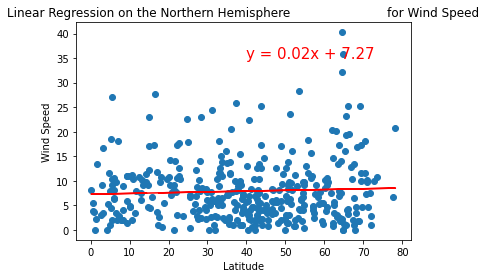

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

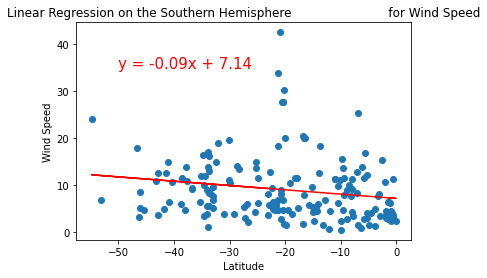

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))